# Data exploration

In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib.patches import Rectangle, Polygon, Patch
%matplotlib inline

import cv2

In [3]:
import sys
sys.path.append("../common/")

In [6]:
from data_utils import GRID_SIZE, TRAIN_WKT, LABELS, get_resized_polygons, TRAIN_IMAGE_IDS, ALL_IMAGE_IDS
from image_utils import get_image_data, generate_pansharpened, generated_upsampled_swir, generate_label_image
from visu_utils import display_img_1b, display_img_3b, display_img_8b, display_labels

In [7]:
#!ls {DATA_16_BANDS} | head

From internet sources : http://www.satpalda.com/product/worldview-3/
        
Panchromatic 	

    Panchromatic: 450 – 800 nm


Multispectral (8 Bands) 	

    Coastal : 400 – 450 nm
    Blue : 450 – 510 nm
    Green : 510 – 580 nm
    Yellow : 585 – 625 nm
    Red : 630 – 690 nm
    Red Edge : 705 – 745 nm
    Near-IR1 : 770 – 895 nm
    Near-IR2 : 860 – 1040 nm


SWIR Bands (8 Bands) 	

    SWIR-1 : 1195 – 1225 nm
    SWIR-2 : 1550 – 1590 nm
    SWIR-3 : 1640 – 1680 nm
    SWIR-4 : 1710 – 1750 nm
    SWIR-5 : 2145 – 2185 nm
    SWIR-6 : 2185 – 2225 nm
    SWIR-7 : 2235 – 2285 nm
    SWIR-8 : 2295 – 2365 nm
    
    
    
From Kaggle :

Imagery details

Sensor : WorldView 3

Wavebands :

    - Panchromatic: 450-800 nm
    - 8 Multispectral: (red, red edge, coastal, blue, green, yellow, near-IR1 and near-IR2) 400 nm - 1040 nm
    - 8 SWIR: 1195 nm - 2365 nm


Sensor Resolution (GSD) at Nadir :

    Panchromatic: 0.31m 
    Multispectral: 1.24 m
    SWIR: Delivered at 7.5m

Dynamic Range
    
    - Panchromatic and multispectral : 11-bits per pixel
    - SWIR : 14-bits per pixel

In [8]:
from image_utils import print_image_info

In [9]:
print_image_info('6120_2_2', 'ms')

('Image size:', 837, 851, 8)
('Metadata:', ['TIFFTAG_COPYRIGHT=(C) COPYRIGHT 2016 DigitalGlobe, Inc., Longmont CO USA 80503', 'TIFFTAG_DATETIME=2016:03:30 19:22:54', 'TIFFTAG_IMAGEDESCRIPTION={\n  bandList = \n  [\n    6;\n    2;\n    3;\n    7;\n    4;\n    8;\n    5;\n    9;\n  ]\n}', 'TIFFTAG_MAXSAMPLEVALUE=2047', 'TIFFTAG_MINSAMPLEVALUE=279'])
('MetadataDomainList:', ['', 'IMAGE_STRUCTURE'])
('Description:', '..\\input\\sixteen_band\\6120_2_2_M.tif')
('ProjectionRef:', '')
('GeoTransform:', (0.0, 1.0, 0.0, 0.0, 0.0, 1.0))


```
TIFF info:  6      2        3       7     4      8        5         9
1 - Pan

Kaggle :  (red, red edge, coastal, blue, green, yellow, near-IR1, near-IR2)

TIFF + Web : Red, Coastal, Blue, Red Edge, Green, Near-IR1, Yellow, Near-IR2
               1     2      3       4        5        6        7        8

Web : Coastal, Blue, Green, Yellow, Red, Red Edge, Near-IR1, Near-IR2
         1       2    3       4      5      6          7        8
         0       1    2       3      4      5          6        7   

Web :    
1 Pan 
2 1 Coastal 
3 2 Blue
4 3  Green
5 4 Yellow
6 5 Red
7 6 Red Edge
8 7 Near-IR1
9 8 Near-IR2
```

RGB <-> 5,3,2 for (17b)

```
Near-Infrared (0.7-1) to 5   
Mid-Infrared   5 to (25-40)
```


```
NDVI (Red, NIR)  -> ndvi_57 | [ndvi_67] | ndvi_58 | ndvi_68
GEMI (Red, NIR)  -> gemi_57 | [gemi_67] | gemi_58 | gemi_68

NDWI (NIR, MIR)  -> ndwi_717 ~~~
NDWI2 (Green, NIR) -> [ndwi2_37] | ndwi2_38
NDTI (Red, Green) -> ndti_53 | ndti_63 ~~~
MNDWI (Green, MIR) -> mndwi_317
```

```
Red = 5, 6 (17b)
NIR = 7, 8 (17b)
Green = 3 (17b)
MIR = 17 (17b)
```



## Visualize a training image

In [10]:
TRAIN_IMAGE_IDS

array(['6040_2_2', '6120_2_2', '6120_2_0', '6090_2_0', '6040_1_3',
       '6040_1_0', '6100_1_3', '6010_4_2', '6110_4_0', '6140_3_1',
       '6110_1_2', '6100_2_3', '6150_2_3', '6160_2_1', '6140_1_2',
       '6110_3_1', '6010_4_4', '6170_2_4', '6170_4_1', '6170_0_4',
       '6060_2_3', '6070_2_3', '6010_1_2', '6040_4_4', '6100_2_2'], dtype=object)

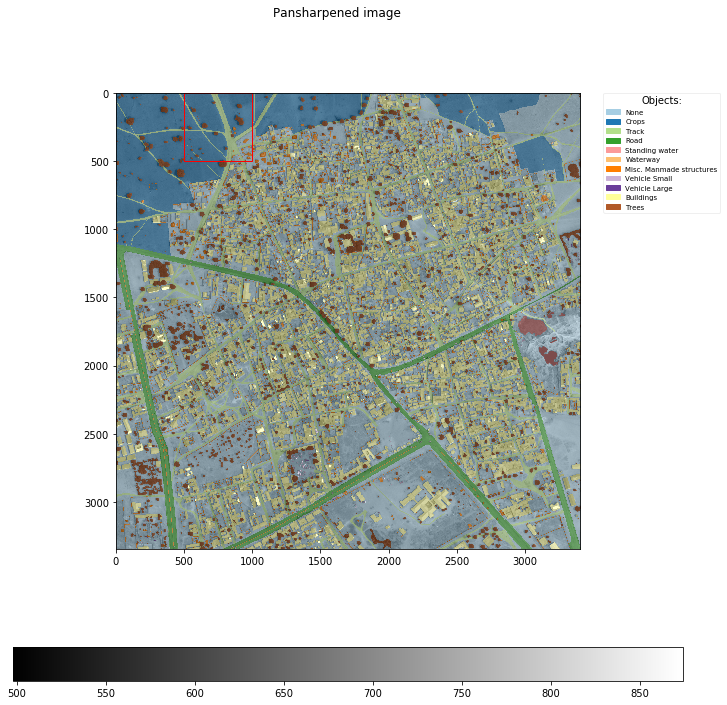

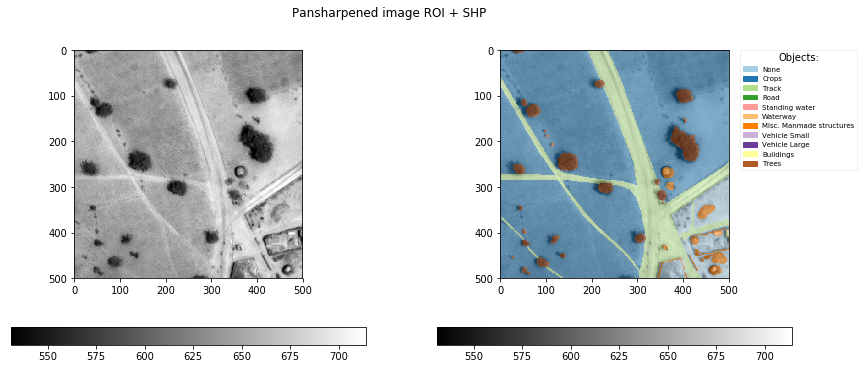

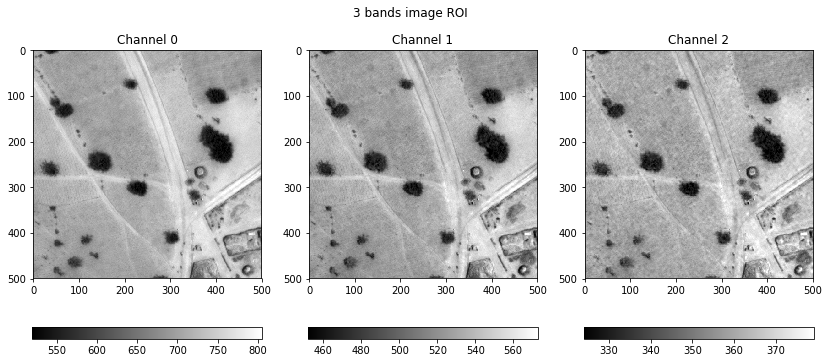

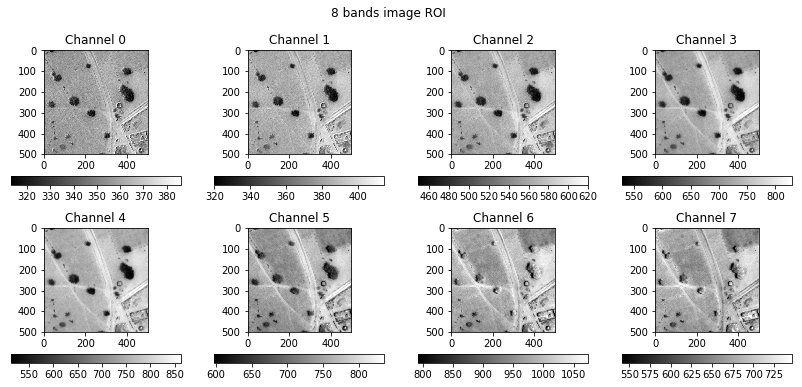

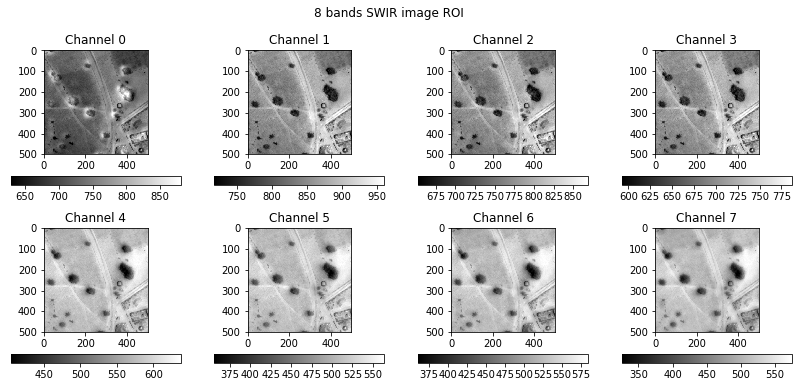

In [18]:
from ipywidgets import interact, IntSlider, FloatSlider   

image_id = "6120_2_2"

generate_pansharpened(image_id, 'ms')
generated_upsampled_swir(image_id, 'swir')

try:
    label_img = generate_label_image(image_id)
    is_test_image=False
except:
    is_test_image=True
    
img_pan = get_image_data(image_id, 'pan')


try:
    img_3b = get_image_data(image_id, '3b')
except:
    img_3b = None
    
img_ms = get_image_data(image_id, 'ms_pan')
img_swir = get_image_data(image_id, 'swir_upsampled')


fig_size = (14, 6)
plus_shapes = False
def interactive_visu(roi_x, roi_w, roi_y, roi_h, alpha):
    
    roi = [roi_x, roi_y, roi_x+roi_w, roi_y+roi_h]
    
    plt.figure(figsize=(12, 12))
    ax = plt.gca()
    display_img_1b(img_pan)
    if not is_test_image:
        display_labels(label_img, alpha=alpha)
    ax.add_patch(Rectangle((roi_x, roi_y), roi_w, roi_h, alpha=1, facecolor='none', edgecolor='red'))
    plt.suptitle("Pansharpened image")
    
    plt.figure(figsize=fig_size)
    plt.subplot(121)
    display_img_1b(img_pan, roi)
    plt.suptitle("Pansharpened image ROI")
    plt.subplot(122)
    display_img_1b(img_pan, roi)
    if not is_test_image:
        display_labels(label_img, roi, alpha=alpha)
    plt.suptitle("Pansharpened image ROI + SHP")


    
    if img_3b is not None:
        plt.figure(figsize=fig_size)
        ax_array = display_img_3b(img_3b, roi)
        plt.suptitle("3 bands image ROI")
        if plus_shapes and not is_test_image:
            display_labels(label_img, roi, ax_array, alpha=alpha)
        
    
    plt.figure(figsize=fig_size)
    ax_array = display_img_8b(img_ms, roi)
    plt.suptitle("8 bands image ROI")
    if plus_shapes and not is_test_image:
        display_labels(label_img, roi, ax_array, alpha=alpha)
        
        

    plt.figure(figsize=fig_size)
    ax_array = display_img_8b(img_swir, roi)
    #ax_array = display_img_8b(img_swir, [r/4/6 for r in roi])
    plt.suptitle("8 bands SWIR image ROI")
    if plus_shapes and not is_test_image:
        display_labels(label_img, roi, ax_array, alpha=alpha)

    
_ = interact(interactive_visu,           
         roi_x=IntSlider(value=500, min=0, max=3500, continuous_update=False), 
         roi_w=IntSlider(value=500, min=150, max=750, continuous_update=False), 
         roi_y=IntSlider(value=1, min=0, max=3500, continuous_update=False), 
         roi_h=IntSlider(value=500, min=150, max=750, continuous_update=False),
         alpha=FloatSlider(value=0.5, min=0, max=1.0, step=0.1, continuous_update=False))

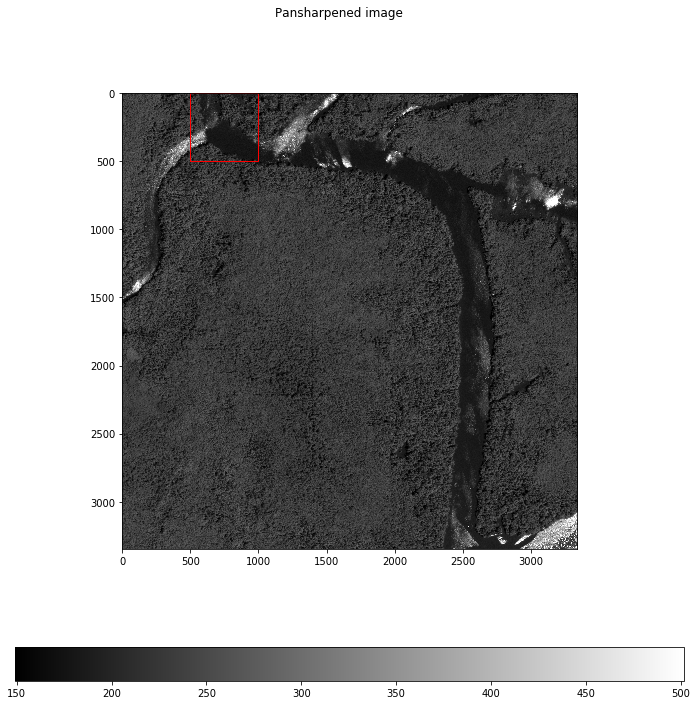

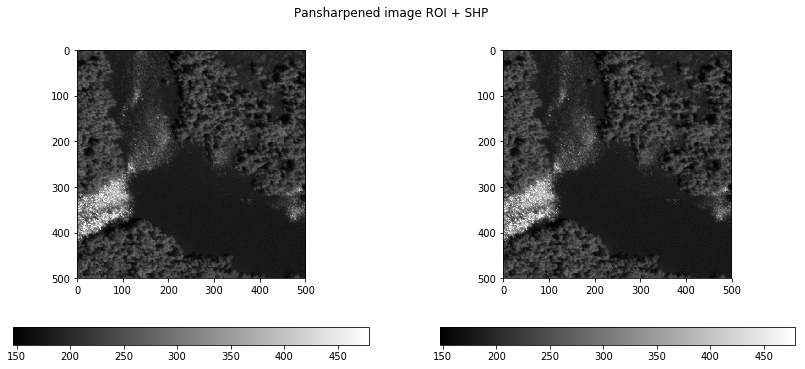

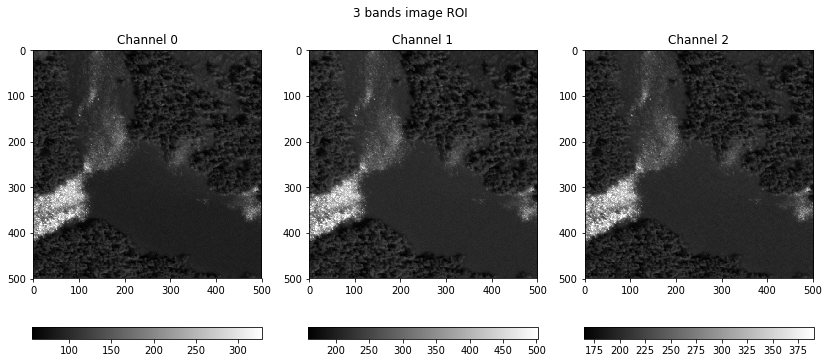

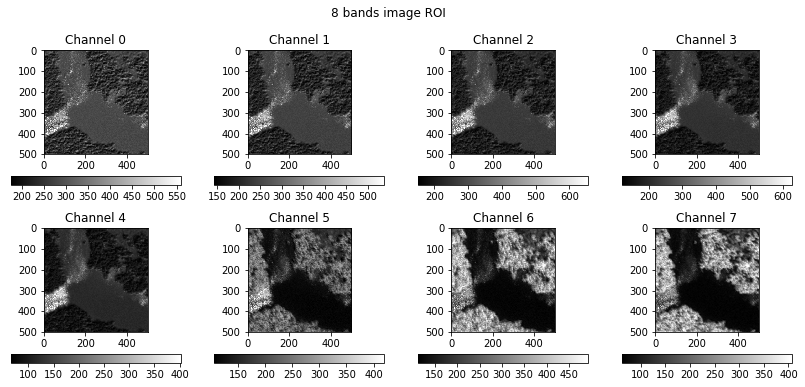

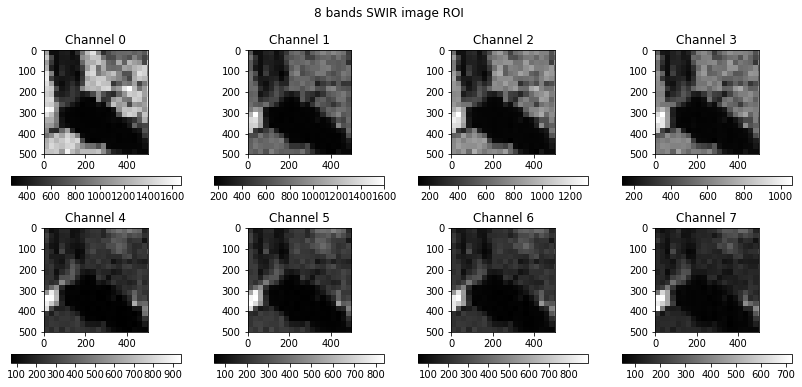

In [20]:
from ipywidgets import interact, IntSlider, FloatSlider   

image_id = "6080_2_3"

generate_pansharpened(image_id, 'ms')
generated_upsampled_swir(image_id, 'swir')

try:
    label_img = generate_label_image(image_id)
    is_test_image=False
except:
    is_test_image=True
    
img_pan = get_image_data(image_id, 'pan')


try:
    img_3b = get_image_data(image_id, '3b')
except:
    img_3b = None
    
img_ms = get_image_data(image_id, 'ms_pan')
img_swir = get_image_data(image_id, 'swir_upsampled')


fig_size = (14, 6)
plus_shapes = False
def interactive_visu(roi_x, roi_w, roi_y, roi_h, alpha):
    
    roi = [roi_x, roi_y, roi_x+roi_w, roi_y+roi_h]
    
    plt.figure(figsize=(12, 12))
    ax = plt.gca()
    display_img_1b(img_pan)
    if not is_test_image:
        display_labels(label_img, alpha=alpha)
    ax.add_patch(Rectangle((roi_x, roi_y), roi_w, roi_h, alpha=1, facecolor='none', edgecolor='red'))
    plt.suptitle("Pansharpened image")
    
    plt.figure(figsize=fig_size)
    plt.subplot(121)
    display_img_1b(img_pan, roi)
    plt.suptitle("Pansharpened image ROI")
    plt.subplot(122)
    display_img_1b(img_pan, roi)
    if not is_test_image:
        display_labels(label_img, roi, alpha=alpha)
    plt.suptitle("Pansharpened image ROI + SHP")


    
    if img_3b is not None:
        plt.figure(figsize=fig_size)
        ax_array = display_img_3b(img_3b, roi)
        plt.suptitle("3 bands image ROI")
        if plus_shapes and not is_test_image:
            display_labels(label_img, roi, ax_array, alpha=alpha)
        
    
    plt.figure(figsize=fig_size)
    ax_array = display_img_8b(img_ms, roi)
    plt.suptitle("8 bands image ROI")
    if plus_shapes and not is_test_image:
        display_labels(label_img, roi, ax_array, alpha=alpha)
        
        

    plt.figure(figsize=fig_size)
    ax_array = display_img_8b(img_swir, roi)
    #ax_array = display_img_8b(img_swir, [r/4/6 for r in roi])
    plt.suptitle("8 bands SWIR image ROI")
    if plus_shapes and not is_test_image:
        display_labels(label_img, roi, ax_array, alpha=alpha)

    
_ = interact(interactive_visu,           
         roi_x=IntSlider(value=500, min=0, max=3500, continuous_update=False), 
         roi_w=IntSlider(value=500, min=150, max=750, continuous_update=False), 
         roi_y=IntSlider(value=1, min=0, max=3500, continuous_update=False), 
         roi_h=IntSlider(value=500, min=150, max=750, continuous_update=False),
         alpha=FloatSlider(value=0.5, min=0, max=1.0, step=0.1, continuous_update=False))

## Visualize tiles of XYZW image, e.g. '6010'

In [21]:
tile_size = (256, 256)
n, m = 5, 5

In [22]:
ids = "6010"

complete_image = np.zeros((5*tile_size[0], 5*tile_size[1]), dtype=np.uint16)
for i in range(n):
    ys = i*tile_size[1]
    ye = ys + tile_size[1]
    for j in range(m):
        xs = j*tile_size[0]
        xe = xs + tile_size[0]
        image_id = ids + "_%i_%i" % (i, j)
        img = get_image_data(image_id, 'pan')
        img = cv2.resize(img, dsize=tile_size)
        complete_image[ys:ye, xs:xe] = img

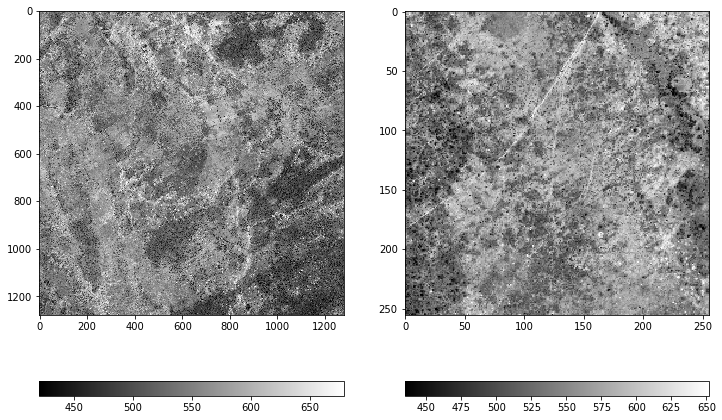

In [23]:
plt.figure(figsize=(12,8))
plt.subplot(121)
display_img_1b(complete_image)
plt.subplot(122)
display_img_1b(complete_image, roi=[128,128,128+256,128+256])

In [24]:
ids = "6020"
complete_image = np.zeros((5*tile_size[0], 5*tile_size[1]), dtype=np.uint16)
for i in range(n):
    ys = i*tile_size[1]
    ye = ys + tile_size[1]
    for j in range(m):
        xs = j*tile_size[0]
        xe = xs + tile_size[0]
        image_id = ids + "_%i_%i" % (i, j)
        img = get_image_data(image_id, 'pan')
        img = cv2.resize(img, dsize=tile_size)
        complete_image[ys:ye, xs:xe] = img

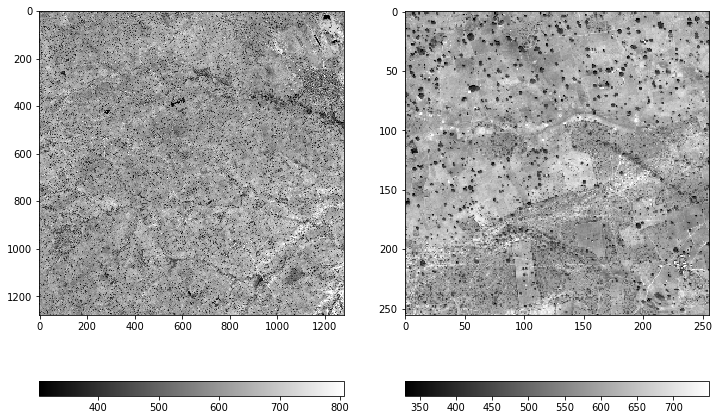

In [25]:
plt.figure(figsize=(12,8))
plt.subplot(121)
display_img_1b(complete_image)
plt.subplot(122)
display_img_1b(complete_image, roi=[128,128,128+256,128+256])

In [26]:
ids = "6030"
complete_image = np.zeros((5*tile_size[0], 5*tile_size[1]), dtype=np.uint16)
for i in range(n):
    ys = i*tile_size[1]
    ye = ys + tile_size[1]
    for j in range(m):
        xs = j*tile_size[0]
        xe = xs + tile_size[0]
        image_id = ids + "_%i_%i" % (i, j)
        img = get_image_data(image_id, 'pan')
        img = cv2.resize(img, dsize=tile_size)
        complete_image[ys:ye, xs:xe] = img

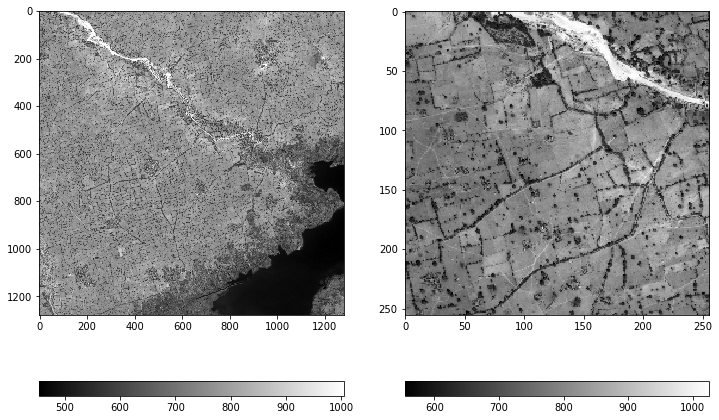

In [27]:
plt.figure(figsize=(12,8))
plt.subplot(121)
display_img_1b(complete_image)
plt.subplot(122)
display_img_1b(complete_image, roi=[128,128,128+256,128+256])

##  Visualize all 25 training images

In [28]:
TRAIN_IMAGE_IDS

array(['6040_2_2', '6120_2_2', '6120_2_0', '6090_2_0', '6040_1_3',
       '6040_1_0', '6100_1_3', '6010_4_2', '6110_4_0', '6140_3_1',
       '6110_1_2', '6100_2_3', '6150_2_3', '6160_2_1', '6140_1_2',
       '6110_3_1', '6010_4_4', '6170_2_4', '6170_4_1', '6170_0_4',
       '6060_2_3', '6070_2_3', '6010_1_2', '6040_4_4', '6100_2_2'], dtype=object)

In [29]:
tile_size = (512, 512)
n, m = 5, 5

In [30]:
# '6110_1_2','6140_1_2',

In [31]:
complete_image = np.zeros((5*tile_size[0], 5*tile_size[1]), dtype=np.uint16)
train_ids = sorted(TRAIN_IMAGE_IDS)
counter = 0
for i in range(n):
    ys = i*tile_size[1]
    ye = ys + tile_size[1]
    for j in range(m):
        xs = j*tile_size[0]
        xe = xs + tile_size[0]
        image_id = train_ids[counter]; counter+=1
        img = get_image_data(image_id, 'pan')
        img = cv2.resize(img, dsize=tile_size)
        complete_image[ys:ye, xs:xe] = img[:,:,0] if len(img.shape) > 2 else img

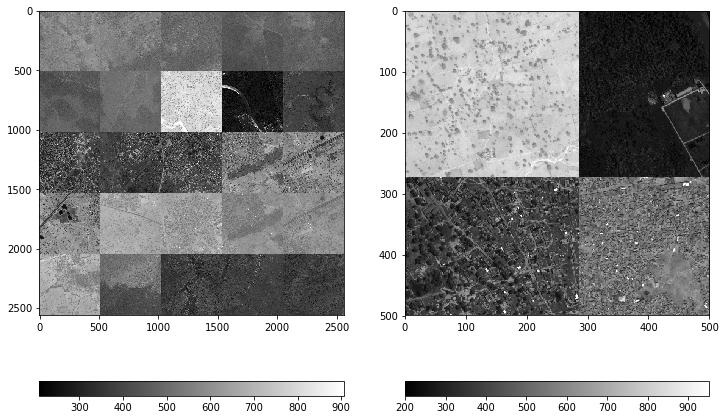

In [32]:
plt.figure(figsize=(12,8))
plt.subplot(121)
display_img_1b(complete_image)
plt.subplot(122)
display_img_1b(complete_image, roi=[1250,750,1250+500,750+500])
# display_img_1b(complete_image, roi=[250,250,250+500,250+500])

In [33]:
print train_ids[7], train_ids[8]

6060_2_3 6070_2_3


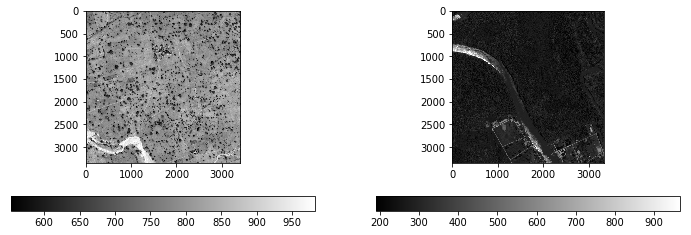

In [34]:
plt.figure(figsize=(12,4))
plt.subplot(121)
display_img_1b(get_image_data("6060_2_3", 'pan'))
plt.subplot(122)
display_img_1b(get_image_data("6070_2_3", 'pan'))

## Class distrubutions on training dataset


In [5]:
from data_utils import get_unit_polygons, get_resized_polygons

In [6]:
training_distrib_class_freq = list([0]*len(LABELS))
training_distrib_class_surface = list([0]*len(LABELS))
training_distrib_class_n_images = list([0]*len(LABELS))

In [7]:
h, w, _ = get_image_data(TRAIN_IMAGE_IDS[0], 'pan', return_shape_only=True)
for image_id in TRAIN_IMAGE_IDS:
    polygons = get_resized_polygons(image_id, 'pan')
    for class_type in polygons:
        poly = polygons[class_type]
        training_distrib_class_surface[class_type] += poly.area * 1.0/ (h*w)
        training_distrib_class_freq[class_type] += len(poly)
        if len(poly) > 0:
            training_distrib_class_n_images[class_type] += 1.0 / len(TRAIN_IMAGE_IDS)

In [8]:
# for image_id in TRAIN_IMAGE_IDS:
#     img_label = get_image_data(image_id, 'label')
#     for i in range(len(LABELS)):
#         training_distrib_class_surface[i] += cv2.countNonZero(img_label[:,:,i]) * 1.0/ (h*w)

In [9]:
for i, n, s, a, c in zip(range(1,11), training_distrib_class_freq[1:], training_distrib_class_surface[1:], training_distrib_class_n_images[1:], LABELS[1:]):
    print "Class :", i, ' - ', c
    print " -- nb polygons:", n
    print " -- surface ratio:", s
    print " -- appearing freq:", a
    print " -- surface per item * appearence freq :", s * a

Class : 1  -  Buildings
 -- nb polygons: 12011
 -- surface ratio: 0.826325299107
 -- appearing freq: 0.48
 -- surface per item * appearence freq : 0.396636143572
Class : 2  -  Misc. Manmade structures
 -- nb polygons: 12315
 -- surface ratio: 0.176383054134
 -- appearing freq: 0.68
 -- surface per item * appearence freq : 0.119940476811
Class : 3  -  Road
 -- nb polygons: 14
 -- surface ratio: 0.202226497263
 -- appearing freq: 0.44
 -- surface per item * appearence freq : 0.0889796587959
Class : 4  -  Track
 -- nb polygons: 239
 -- surface ratio: 0.750718954178
 -- appearing freq: 0.92
 -- surface per item * appearence freq : 0.690661437844
Class : 5  -  Trees
 -- nb polygons: 48347
 -- surface ratio: 2.54269410218
 -- appearing freq: 1.0
 -- surface per item * appearence freq : 2.54269410218
Class : 6  -  Crops
 -- nb polygons: 422
 -- surface ratio: 6.89110605224
 -- appearing freq: 0.56
 -- surface per item * appearence freq : 3.85901938926
Class : 7  -  Waterway
 -- nb polygons: 2

Training class groups : number of pixels x appearence frequency ~ probability that a pixel of the image is of a class

1. `Buildings` and `Misc. Manmade structures` and `Track` : [1, 2, 4]
2. `Standing water` and `Road` and `Waterway` : [8, 3, 7]
3. `Trees` and `Crops`: [5, 6]
4. `Vehicle Small` : [10]
5. `Vehicle Large` : [9]


Training class groups : (number of pixels / number of objects) x appearence frequency

1. `Buildings` and `Trees` and `Standing water` : [1, 5, 8]
2. `Misc. Manmade structures` and `Vehicle Large` and `Vehicle Small` : [2, 9, 10]
3. `Track` and `Road` and `Crops`: [4, 3, 6]
4. `Waterway` : [7]

In [35]:
from geo_utils.GeoImage import GeoImage
from geo_utils.GeoImageTilers import GeoImageTilerConstSize

from data_utils import get_filename

In [36]:
tile_size=(256, 256)
overlapping = int(min(tile_size[0], tile_size[1]) * 0.45)
include_nodata = False
gimg_17b = GeoImage(get_filename(TRAIN_IMAGE_IDS[0], '17b'))

gimg_17b_tiles = GeoImageTilerConstSize(gimg_17b, tile_size=tile_size, min_overlapping=overlapping)
# gimg_17b_tiles = GeoImageTiler(gimg_17b, tile_size=tile_size, overlapping=overlapping)

print 25 * gimg_17b_tiles.nx * gimg_17b_tiles.ny 
print gimg_17b_tiles.nx, gimg_17b_tiles.ny 

15000
25 24


In [37]:
def get_image_ids(classes, gb):
    image_ids = set()
    for c in classes:
        ids = gb.get_group(c)['ImageId'].values.tolist()
        image_ids.update(ids)
    return list(image_ids)


def train_tile_iterator(classes, presence_percentage=2, tile_size=(256, 256)):
    """
    Method returns a random tile in which at least one class of `classes` is present more than `presence_percentage` 
    
    Random tile generation is a uniform tile selection. 
    5 random images containing `classes` are selected. Overlapping tiles are searched that contain any of class.
    
    To uniformize tile generation, total pixel number of each class is counted and a generated tile is selected in 
    a way to keep total pixel numbers balanced.
    
    
    """
    gb = TRAIN_WKT[~TRAIN_WKT['MultipolygonWKT'].str.contains("EMPTY")].groupby('ClassType')
    overlapping = int(min(tile_size[0], tile_size[1]) * 0.25)
    include_nodata = False
    
    total_n_pixels = np.array([0]*len(classes))
    
    while True:
        
        image_ids = get_image_ids(classes, gb)
        np.random.shuffle(image_ids)
        step = 5
        
        for i, _ in enumerate(image_ids[::step]):
            e = min(step*i+step, len(image_ids))
            ids = image_ids[step*i:e] 
            # Open 5 labels images
            gimg_tilers = []
            for image_id in ids:
                gimg_label = GeoImage(get_filename(image_id, 'label'))
                gimg_label_tiles = GeoImageTilerConstSize(gimg_label, tile_size=tile_size, min_overlapping=overlapping)
                gimg_tilers.append(gimg_label_tiles)
            
            counter = 0
            max_counter = gimg_tilers[0].nx * gimg_tilers[0].ny
            while counter < max_counter:
                all_done = True
                
                for tiler_index, tiles in enumerate(gimg_tilers): 
                    for tile_info_label in tiles:            
                        all_done = False
                        tile_label, xoffset_label, yoffset_label = tile_info_label
                        h, w, _ = tile_label.shape
                        class_freq = np.array([0]*len(classes))
                        for ci, cindex in enumerate(classes):
                            class_freq[ci] += cv2.countNonZero(tile_label[:,:,cindex])
                        # If class representatifs are less than presence_percentage in the tile -> discard the tile                        
                        if np.sum(class_freq) * 100.0 / (h*w)  < presence_percentage:
                            continue
                            
                        if np.sum(total_n_pixels) > 1:
                            old_argmax = np.argmax(total_n_pixels)
                            new_argmax = np.argmax(class_freq)
                            print new_argmax, old_argmax
                            if old_argmax == new_argmax:
                                continue
                        total_n_pixels += class_freq

                        tile_label = tile_label[:,:,classes]

                        gimg_17b = GeoImage(get_filename(ids[tiler_index], '17b'))
                        width = min(tile_size[0], gimg_17b.shape[1] - xoffset_label)
                        height = min(tile_size[1], gimg_17b.shape[0] - yoffset_label)
                        tile_17b = gimg_17b.get_data([xoffset_label, yoffset_label, width, height])
                        assert tile_label.shape[:2] == tile_17b.shape[:2], "Tile sizes are not equal: {} != {}".format(tile_label.shape[:2], tile_17b.shape[:2])
                        yield tile_17b, tile_label        
                        break
                
                counter += 1
                # Check if all tilers have done the iterations                
                if all_done:
                    break
                

In [38]:
classes = [1,2,4]
tile_generator = train_tile_iterator(classes)

(256L, 256L, 17L) (256L, 256L, 3L)


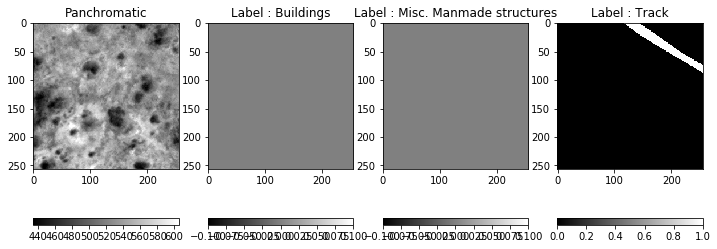

In [39]:
for x, y in tile_generator:
    print x.shape, y.shape
    plt.figure(figsize=(12,6))
    n_labels = y.shape[2]
    if n_labels < 8:
        n, m = 1, n_labels+1
    else:
        n, m = 3, int(n_labels * 1.0 / 3.0 + 0.5) + 1,     
    plt.subplot(n,m,1)
    display_img_1b(x[:,:,0])
    plt.title("Panchromatic")    
    for j in range(n_labels):
        plt.subplot(n,m,j+2)
        display_img_1b(y[:,:,j])
        plt.title("Label : %s" % LABELS[classes[j]])
    
    break